1. 行命令%:將 matplotlib 的圖表嵌入 inline 到 Jupyter Notebook。
2. 從 matplotlib 匯入 pyplot 模組，簡稱為 plt。
3. 匯入 numpy 套件，簡稱為np。

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

1. 設定 data 每個點的長度、寬度與類別 (0或1)。
2. 設定 mystery_flower 的長度與寬度。

In [4]:
data = [[3,1.5,1],
      [2,1,0],
      [4,1.5,1],
      [3,1,0],
      [3.5,0.5,1],
      [2,0.5,0],
      [5.5,1,1],
      [1,1,0]]
mystery_flower = [4.5,1]

In [6]:
#        network
#           O     flower type
#      w1  / \  w2    b
# length  O   O  width

自訂激活函數 sigmoid。

傳回函數結果 return，exp 為指數。

自訂激活函數 sigmoid_P。

In [9]:
def sigmoid(X):
    return 1 / (1+np.exp(-X))
    
def sigmoid_P(x):
    return sigmoid(x) * (1-sigmoid(x))

等差數列 linspace。

繪製 plot。

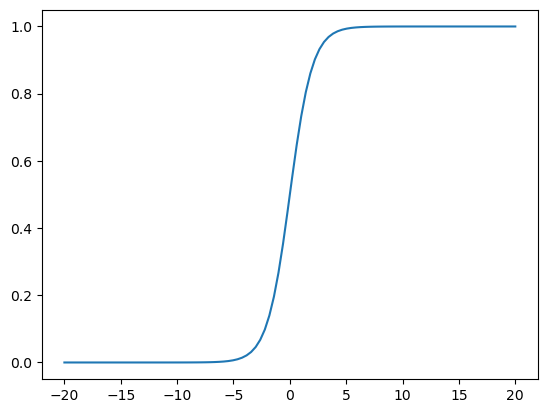

In [12]:
T = np.linspace(-20, 20, 100)
Y = sigmoid(T)
plt.plot(T,Y)
plt.show()

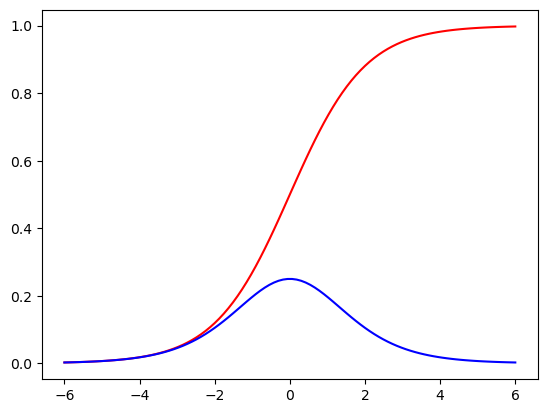

In [14]:
T = np.linspace(-6,6,100)
plt.plot(T,sigmoid(T),c='r')   # 顏色: c = 'r'紅色、'b'藍色。
plt.plot(T,sigmoid_P(T), c='b')
plt.show()

x 與 y 軸繪出 0-6 等級。

顯示網格 grid。

迴圈中設定整數序列 range 與長度 len,如 i 迴圈於data。

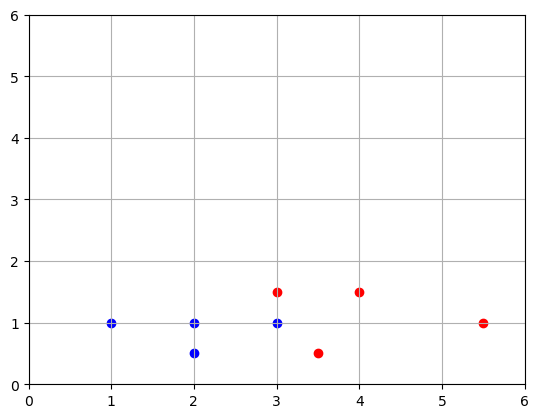

In [17]:
plt.axis([0, 6, 0, 6])
plt.grid()

for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0], point[1], c=color)   # 散佈圖: scatter
plt.show()

## 訓練循環
擬隨機數 random.randn 返回樣本具常態分配。

In [20]:
learning_rate = 0.3
costs = []
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

迴圈中設定整數序列 range。

整數返回 randint。

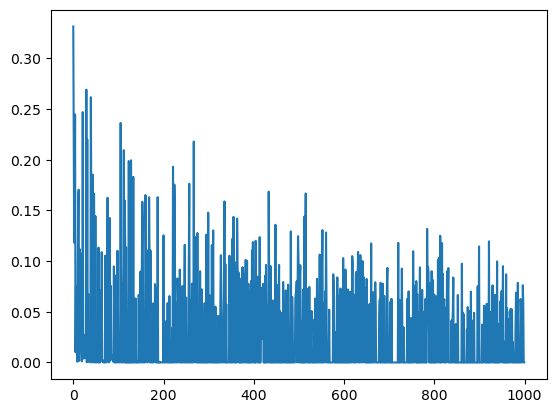

In [23]:
for i in range(100000):   # 迴圈中設定整數序列 range。
    ri = np.random.randint(len(data))   # 整數返回 randint。
    point = data[ri]
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    target = point[2]
    cost = np.square(pred - target)

    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_P(z) * (1 - sigmoid(z))
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1

    dcost_dz = dcost_pred * dpred_dz
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db

    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            z = point[0]*w1 + point[1]*w2 + b
            pred = sigmoid(z)
            target = point[2]
            cost_sum += np.square(pred - target)   # 平方 square。
        costs.append(cost_sum / len(data))   # 在串列末尾附加新元素 append。

plt.plot(costs)
plt.show()

In [25]:
w1

8.445756081186637

In [27]:
w2

4.086634752398541

In [29]:
b

-30.375499753730864

In [31]:
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)   # 預測模型。
    print("pred: {}".format(pred))   # 格式化 format 列出。

[3, 1.5, 1]
pred: 0.7487055867856965
[2, 1, 0]
pred: 8.293646055189028e-05
[4, 1.5, 1]
pred: 0.9999279066532171
[3, 1, 0]
pred: 0.2785638144958938
[3.5, 0.5, 1]
pred: 0.7734620116396232
[2, 0.5, 0]
pred: 1.0749181300353885e-05
[5.5, 1, 1]
pred: 0.9999999982485004
[1, 1, 0]
pred: 1.781706844024972e-08


In [33]:
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 + b
pred = sigmoid(z)
pred

0.9999918463552141

In [35]:
def which_flower(length, width):
    z = length*w1 + width*w2 + b
    print(z)
    pred = sigmoid(z)
    if pred < 0.5:
        print("blue")
    else:
        print("red")

In [37]:
which_flower(0.5,1)

-22.065986960739004
blue


In [39]:
which_flower(4.5,1)

11.717037364007538
red


In [41]:
import os

In [43]:
from gtts import gTTS
tts = gTTS(text='紅色',lang='zh-TW')
tts.save('red.mp3')

tts = gTTS(text='藍色',lang='zh-TW')
tts.save('blue.mp3')

In [44]:
def which_flower(length, width):
    z = length*w1 + width*w2 + b
    print(z)
    pred = sigmoid(z)
    if pred < 0.5:
        os.system("blue.mp3")
    else:
        os.system("red.mp3")

In [47]:
which_flower(4.5, 1)

11.717037364007538


In [49]:
which_flower(0.4, 2)

-18.823927816459125
